# Classification ignition point 

This project is a classification problem

It is to determine whether a point has a probability to be an ignition point for wildfire. The ignition point is where the wildfire starts. To know the probability where a fire would start is central at Descartes because it will help us to better simulate wildfires.

Don't hesitate to contact us, if you have any doubts on what is asked or if you encounter errors while using the notebook.

In [1]:
# Import the required libraries

from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LassoCV, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
%reload_ext autoreload
%autoreload 2

# Parameters

In [3]:
DATA_PATH = Path("C:/Users/channa/Downloads/data-scientist-technical-test-main/data-scientist-technical-test-main/data")
DATAFRAME_FOLDER_PATH = DATA_PATH / "classification_dataframe"

# Download data

In [4]:
dataframe_path = DATAFRAME_FOLDER_PATH / "dataset.csv"

In [5]:
# Import the necessary libraries
import pandas as pd

# Load the dataset from the specified path
df = pd.read_csv(dataframe_path)

# Retrieve and display the list of column names in the DataFrame
column_list = list(df.columns)
print("List of columns:", column_list)

List of columns: ['Unnamed: 0', 'Date', 'distance_fire_stations', 'distance_rivers', 'distance_roads', 'distance_powerlines', 'cropland', 'forest_deciduous_broad', 'forest_deciduous_needle', 'forest_evergreen_broad', 'forest_evergreen_needle', 'forest_mixed', 'forest_unknown', 'herbaceous_vegetation', 'moss_lichen', 'shrubland', 'sprarse_vegetation', 'urban', 'water', 'wetland', 'aspect', 'elevation', 'pop_dens', 'slope', 'anom_max_temp', 'anom_max_wind_vel', 'anom_avg_temp', 'anom_avg_rel_hum', 'anom_avg_soil', 'anom_sum_prec', 'max_temp', 'max_wind_vel', 'avg_temp', 'avg_wind_angle', 'avg_rel_hum', 'avg_soil', 'sum_prec', 'forest', 'vegetation_class', 'Year', 'max_max_temp', 'yearly_avg_temp', 'ignition']


# Structure of the dataframe and Task


- Each row consists of an ignition or non-ignition point with the given features associated. The features were chosen as potentially influencing ignition.


- The last column named `ignition` says if the point was a real ignition point (meaning that it occurred historically), in that case the value is `1`. Otherwise, when the value is `0`, it means that it is a 'non-ignition point'.


- The columns `cropland` to `wetland` gives the ratio of each of the vegetation classes under which the ignition or non-ignition point lies. The sum of these ratios should be equal to 1. For more information refer to this website: https://lcviewer.vito.be/


- The temperatures should be in degrees celsius `(°C)`.


- The weather data come from different sources and they might have different units.

| Column name | Definition | Unit |
|--------|-----------|--------|
| `ignition`   | Target column| Boolean: {1,0} |
| `distance_{feature}` | Distance to nearest feature  |  Meters (m) |
| vegetation class: from `cropland` to `wetland`  |  Ratio of each of the vegetation classes  under which the ignition or non-ignition point lies    |  No unit (between 0 and 1)  |
| `aspect`  |  Orientation of the slope    |  Degrees (°)  |
| `elevation`  |  elevation value    |  Meters  |
| `slope`  |  Slope value    |  Degrees (°)  |
| `pop_dens`  |  Population density value    |  Persons per km2  |
| `max_temp`  |  Maximum temperature of the day    |  Degrees celsius (°C)  |
| `avg_temp`  |  Average temperature of the day   |  Degrees celsius (°C)  |
| `max_wind_vel`  |  Maximum wind velocity of the day    |  Meters per second (m/s)  |
| `avg_wind_angle`  |  Average angle of the vector wind over the day    |  Degrees (°)  |
| `avg_rel_hum`  |  Average relative humidity over the day    |  %  |
| `avg_soil`  |  Average soil moisture of the day    |  m3/m3  |
| `sum_prec`  |  Cumulative rainfall precipitation of the day    |  Millimeters (mm)  |
| `yearly_avg_temp`  |  Average temperature over the year    |  Degrees celsius (°C)  |
| `anom_{feature}`  |  Standardized anomaly of weather for the given day over the last 30 years. When the anomaly is positive, it means that the feature value is greater that the 30-year average    |  No unity |
| `forest`  |  Sum of all the columns where the names start with `forest`   |  No unit  |
| `vegetation_class`  |  Vegetation with the max occurrence in the vicinity of the ignition/non-ignition point    |  Without unit  |
| `Year`  |  Year of ignition    |  Without unit  |
| `max_max_temp`  |  Missing information    |  Missing information  |



# Task


🚨 **Your task is to design a classification algorithm to predict whether a point is an ignition point or not. The target column is `ignition`** 🚨

You can import any package you want.

In [6]:
# Display descriptive statistics for numerical variables
# List of numerical variables to analyze
numeric_vars = ['distance_fire_stations', 'distance_rivers', 'distance_roads', 'distance_powerlines', 'cropland', 
                'aspect', 'elevation', 'pop_dens', 'slope', 'anom_max_temp', 'anom_max_wind_vel', 'anom_avg_temp', 
                'anom_avg_rel_hum', 'anom_avg_soil', 'anom_sum_prec', 'max_temp', 'max_wind_vel', 'avg_temp', 
                'avg_wind_angle', 'avg_rel_hum', 'avg_soil', 'sum_prec', 'forest', 'max_max_temp', 'yearly_avg_temp']

# Compute and display descriptive statistics for numerical variables
numeric_stats = df[numeric_vars].describe()
print("Descriptive statistics for numerical variables:\n", numeric_stats)

# Display descriptive statistics for categorical variables
# List of categorical variables to analyze
categorical_vars = ['vegetation_class', 'Year', 'ignition']

# Compute and display descriptive statistics for categorical variables
categorical_stats = df[categorical_vars].describe(include='all')
print("Descriptive statistics for categorical variables:\n", categorical_stats)


Descriptive statistics for numerical variables:
        distance_fire_stations  distance_rivers  distance_roads  \
count            22030.000000     22030.000000    22030.000000   
mean             23646.387792      5966.777537     5152.597702   
std              19248.657525      7515.660146     6924.754655   
min                  0.000000         0.000000        0.000000   
25%               9568.829605       707.106781      250.000000   
50%              18494.931738      2610.076627     1581.138830   
75%              32310.988843      8384.323013     7941.190087   
max             110474.261708     43784.986011    40094.419811   

       distance_powerlines      cropland        aspect     elevation  \
count         22030.000000  22030.000000  22035.000000  22035.000000   
mean          30127.951951      0.006415    177.444760    189.545768   
std           30099.446768      0.057848     85.610114    319.669314   
min               0.000000      0.000000      0.000000   -100.000000

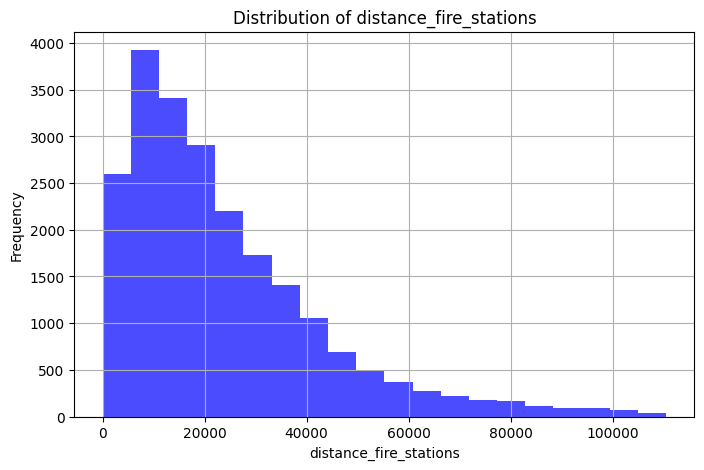

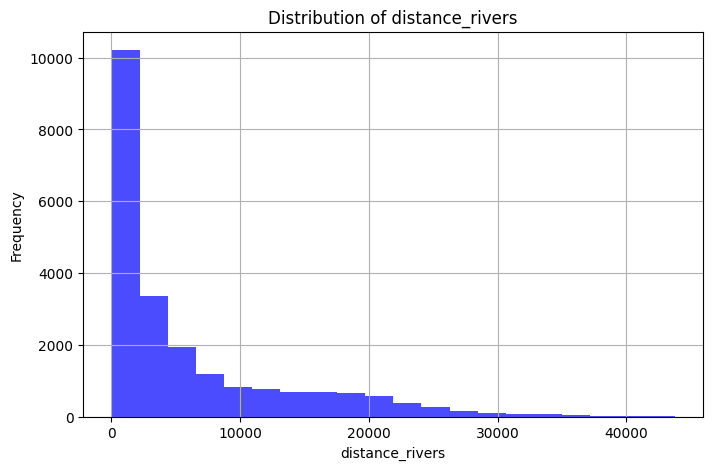

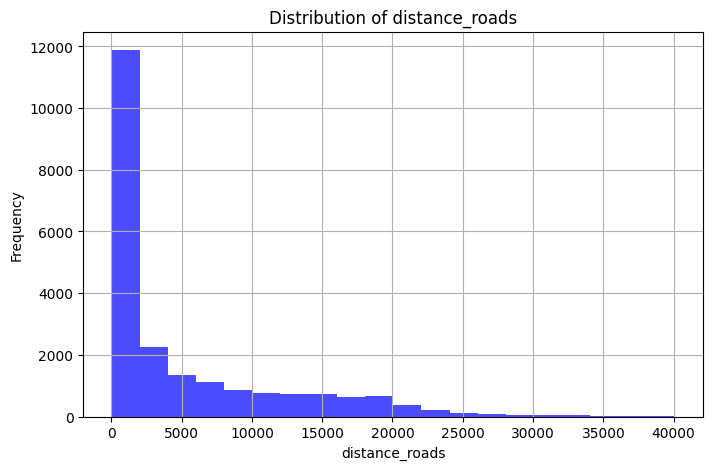

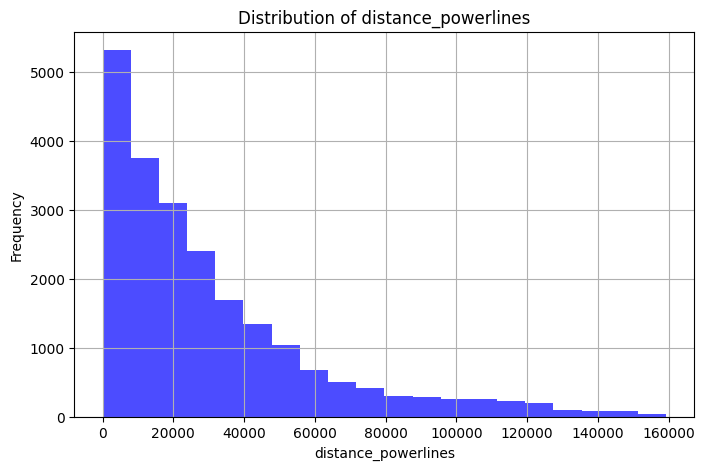

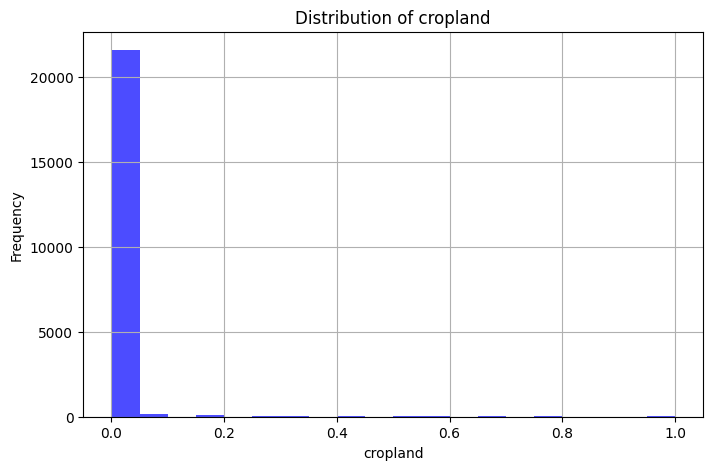

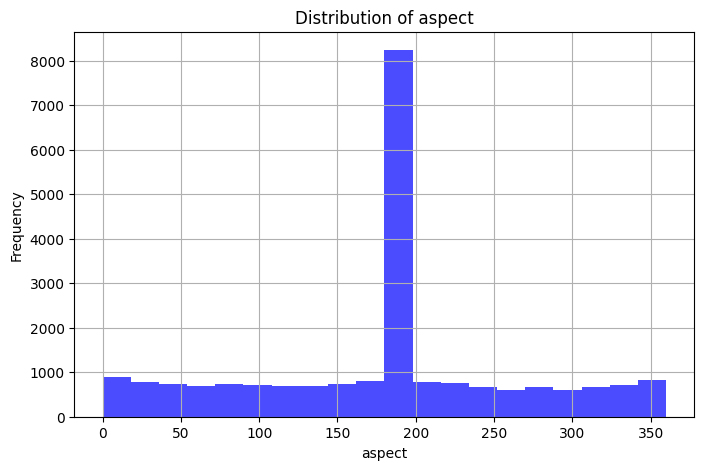

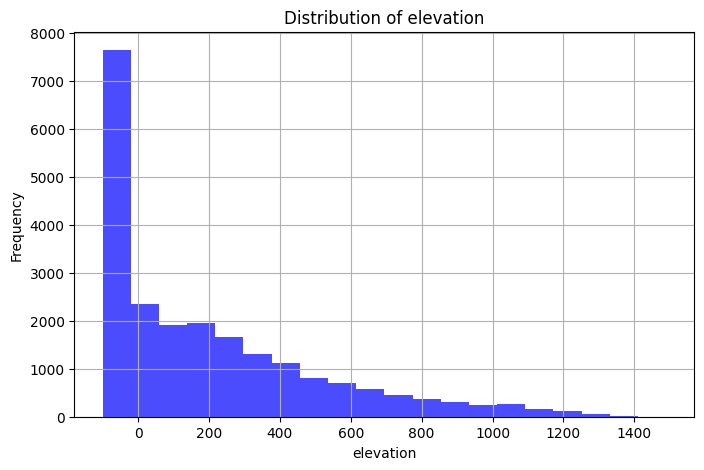

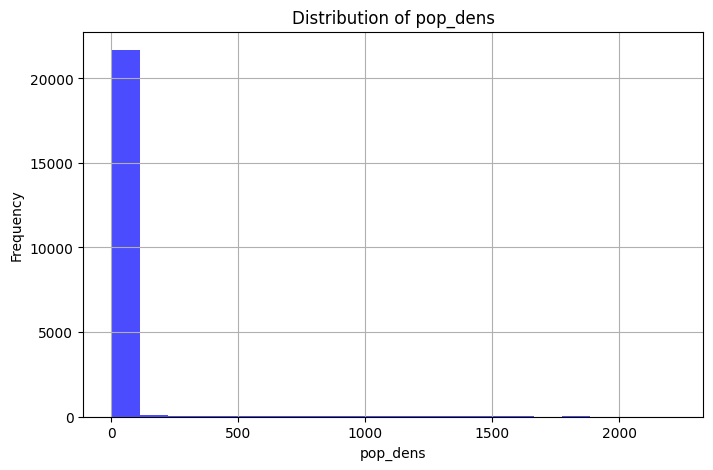

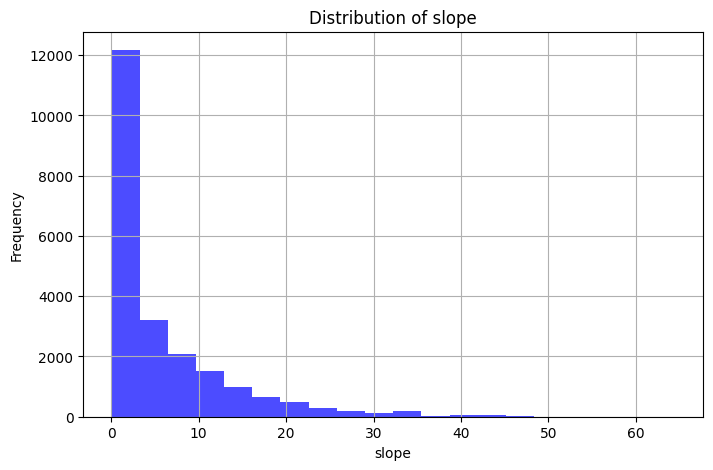

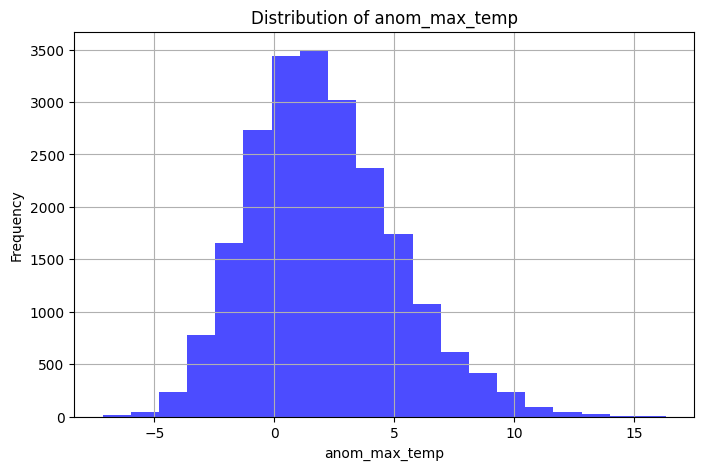

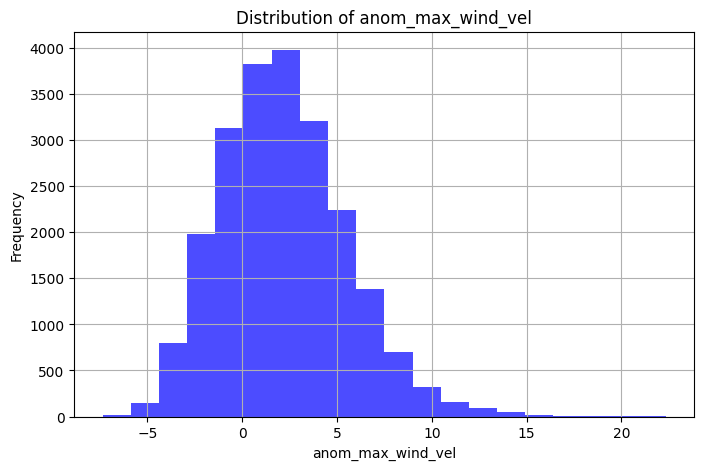

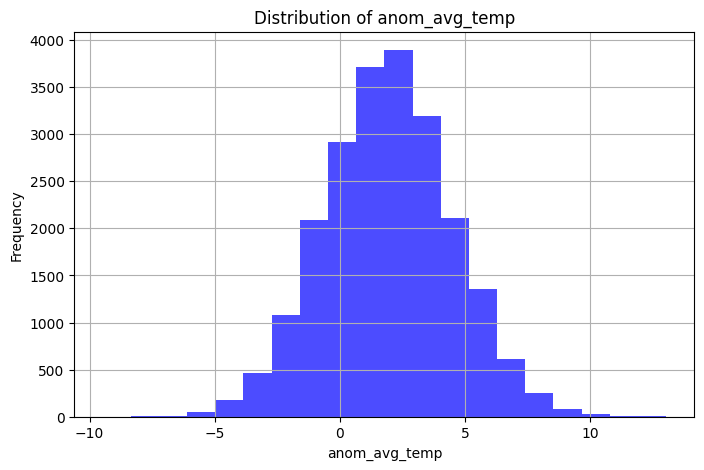

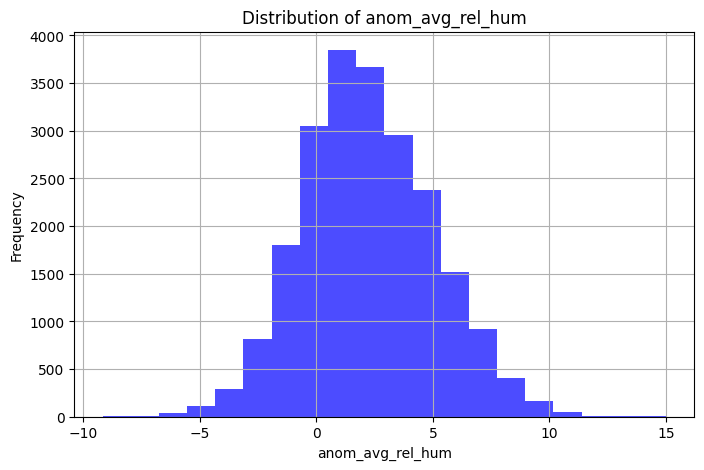

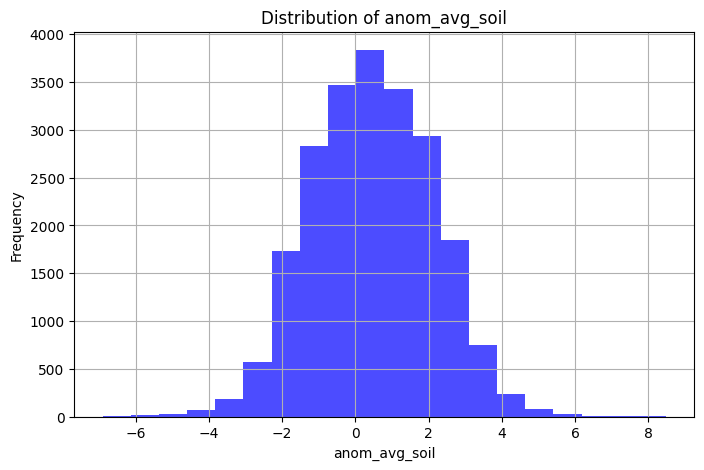

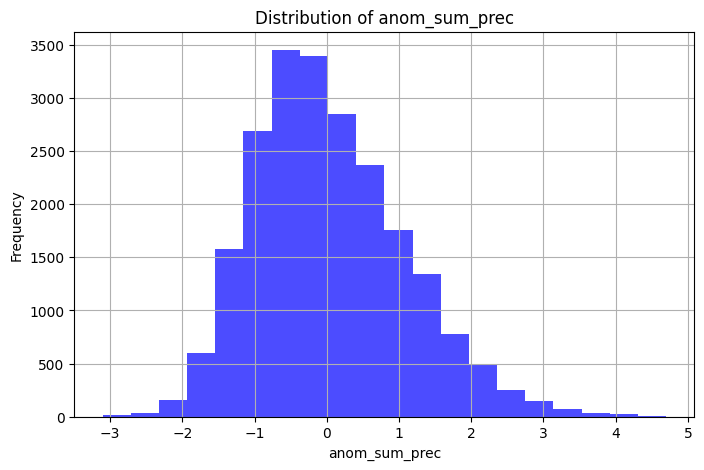

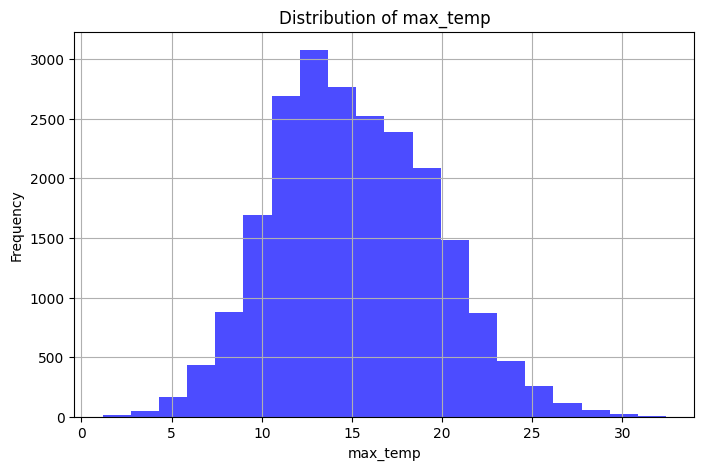

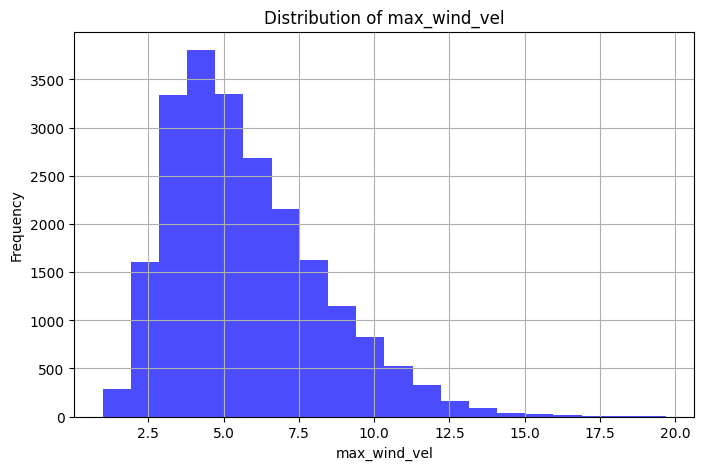

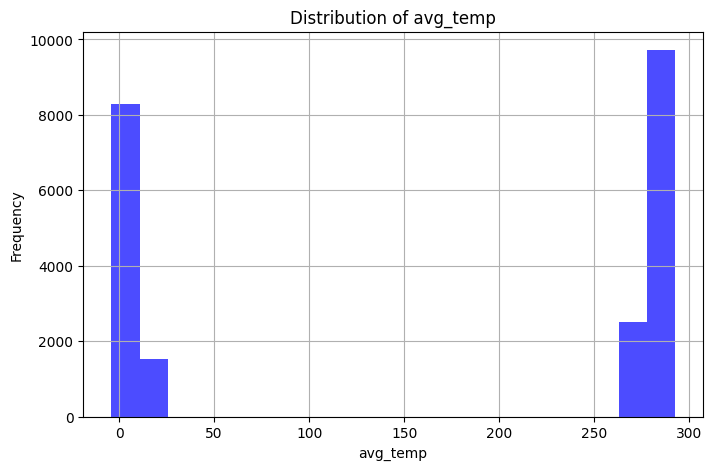

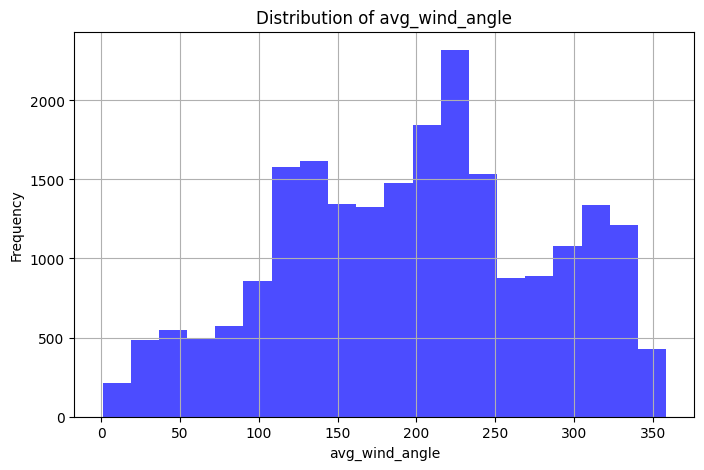

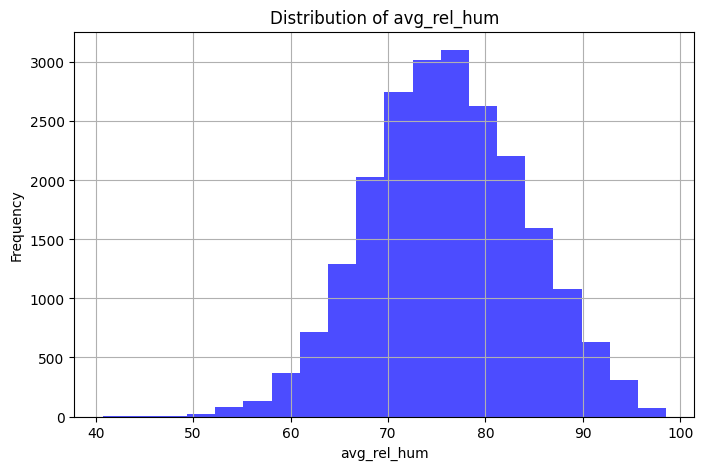

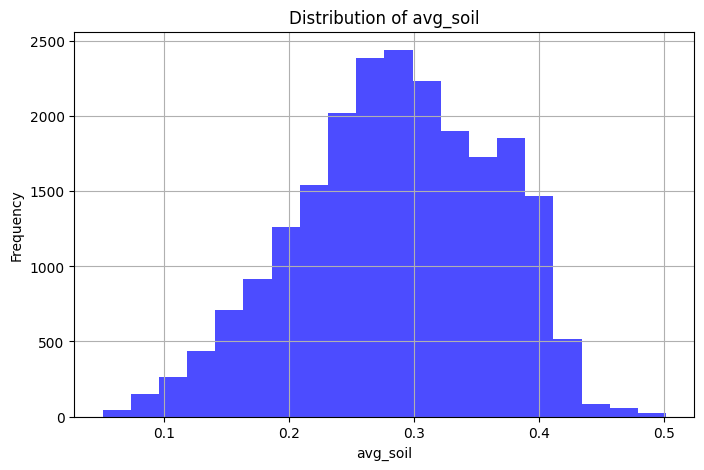

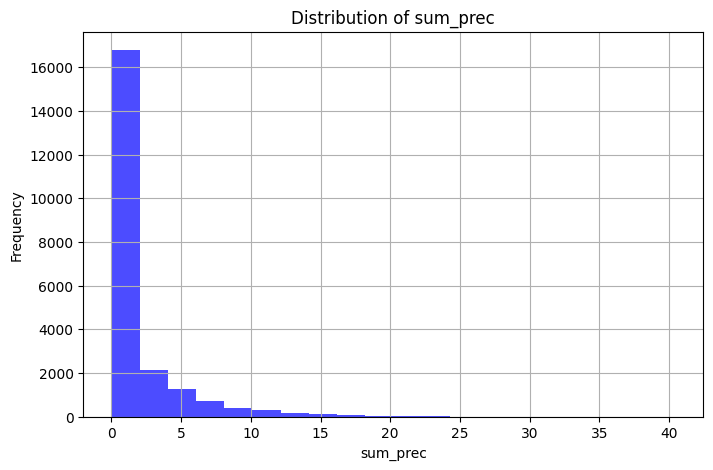

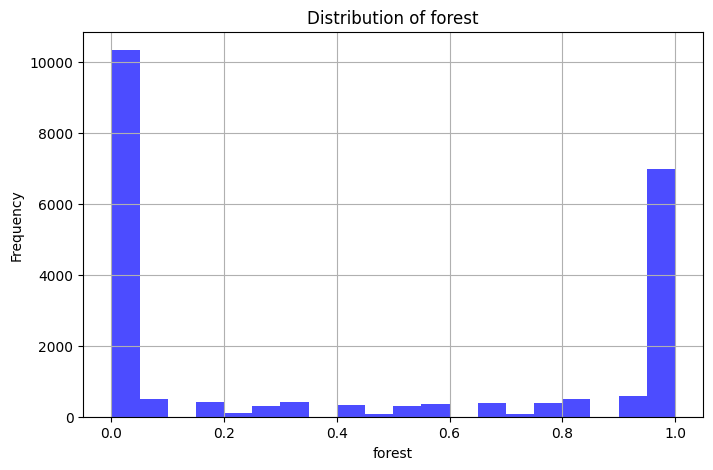

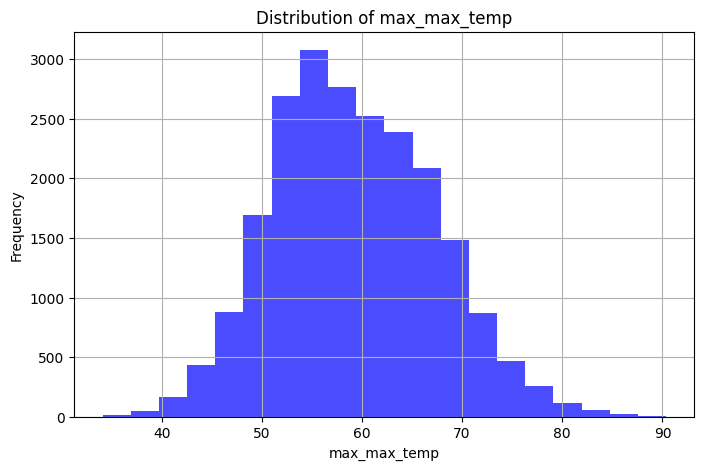

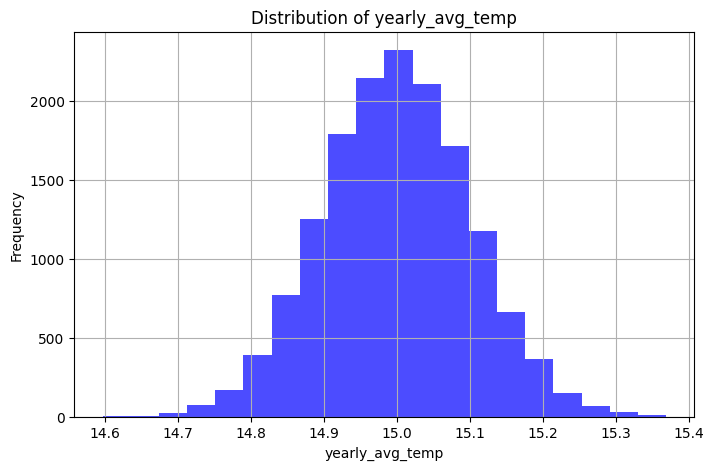

In [7]:
# Create distribution plots for each numerical variable
for var in numeric_vars:
    # Set up the figure and axes
    plt.figure(figsize=(8, 5))
    
    # Create a histogram of the variable with specified bins and color
    plt.hist(df[var], bins=20, color='blue', alpha=0.7)
    
    # Set the title and labels for the axes
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    
    # Add a grid to the plot
    plt.grid(True)
    
    # Display the plot
    plt.show()


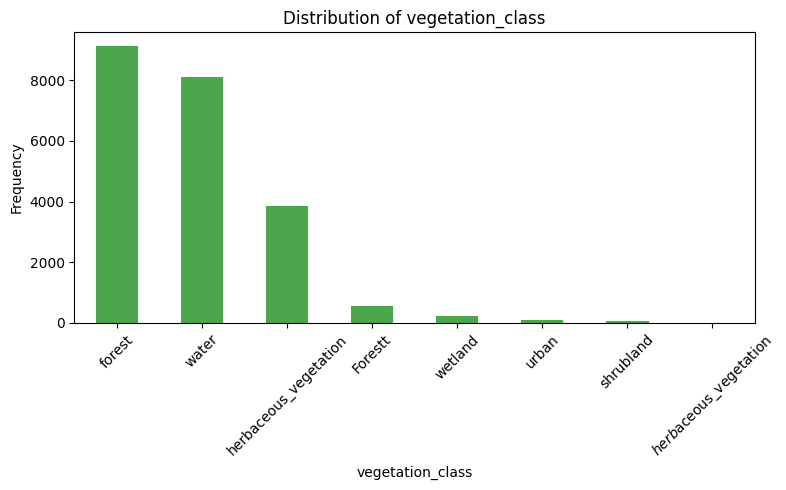

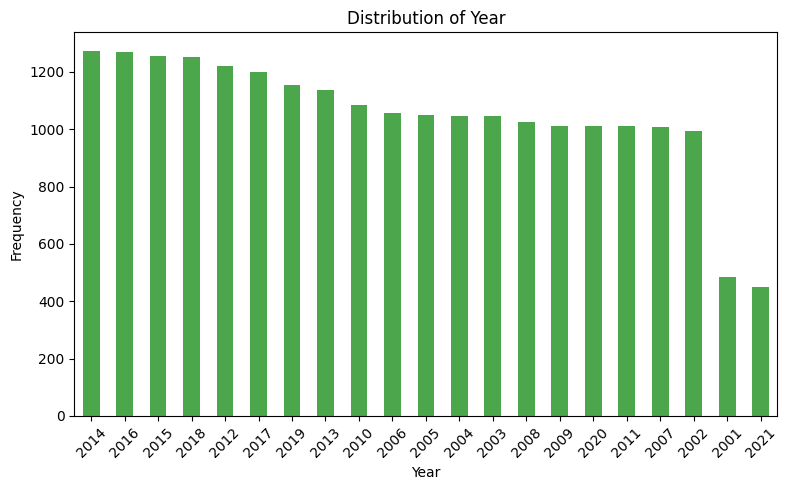

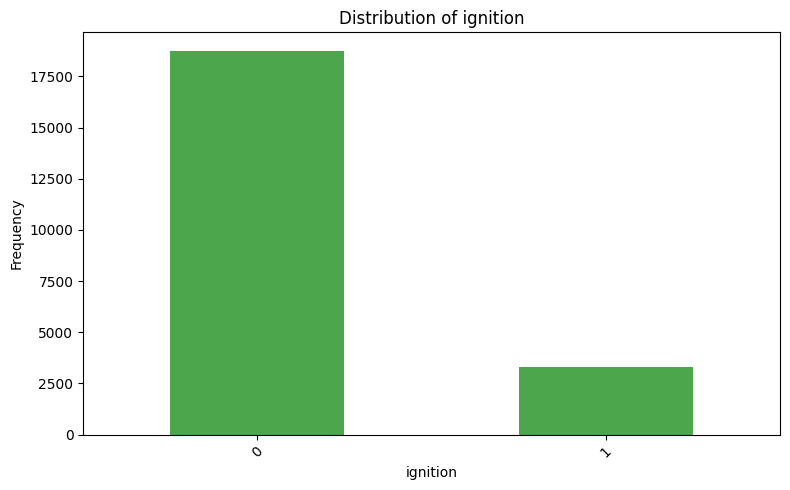

In [8]:
# Create distribution plots for each categorical variable
for var in categorical_vars:
    # Set up the figure and axes
    plt.figure(figsize=(8, 5))
    
    # Compute the value counts for the categorical variable
    value_counts = df[var].value_counts()
    
    # Create a bar plot of the value counts with specified color
    value_counts.plot(kind='bar', color='green', alpha=0.7)
    
    # Set the title and labels for the axes
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Adjust layout for better spacing
    plt.tight_layout()
    
    # Display the plot
    plt.show()


In [9]:
# Get all unique categories of the 'vegetation_class' variable
vegetation_modalities = df['vegetation_class'].unique()

# Display the unique categories
print("Unique modalities of the 'vegetation_class' variable:")
for modality in vegetation_modalities:
    print(modality)

# We notice that there are spelling errors in some categories of the 'vegetation_class' variable.
# We will replace the incorrect values with the correct ones.

# Replace all occurrences of 'Forestt' with 'forest' and '$herb$aceous_vegetation' with 'herbaceous_vegetation' in the 'vegetation_class' column
df['vegetation_class'] = df['vegetation_class'].replace('Forestt', 'forest')
df['vegetation_class'] = df['vegetation_class'].replace('$herb$aceous_vegetation', 'herbaceous_vegetation')

# Verify that the replacements have been made
print("Unique modalities of the 'vegetation_class' variable after replacement:")
print(df['vegetation_class'].unique())


Unique modalities of the 'vegetation_class' variable:
forest
wetland
herbaceous_vegetation
Forestt
shrubland
water
urban
nan
$herb$aceous_vegetation
Unique modalities of the 'vegetation_class' variable after replacement:
['forest' 'wetland' 'herbaceous_vegetation' 'shrubland' 'water' 'urban'
 nan]


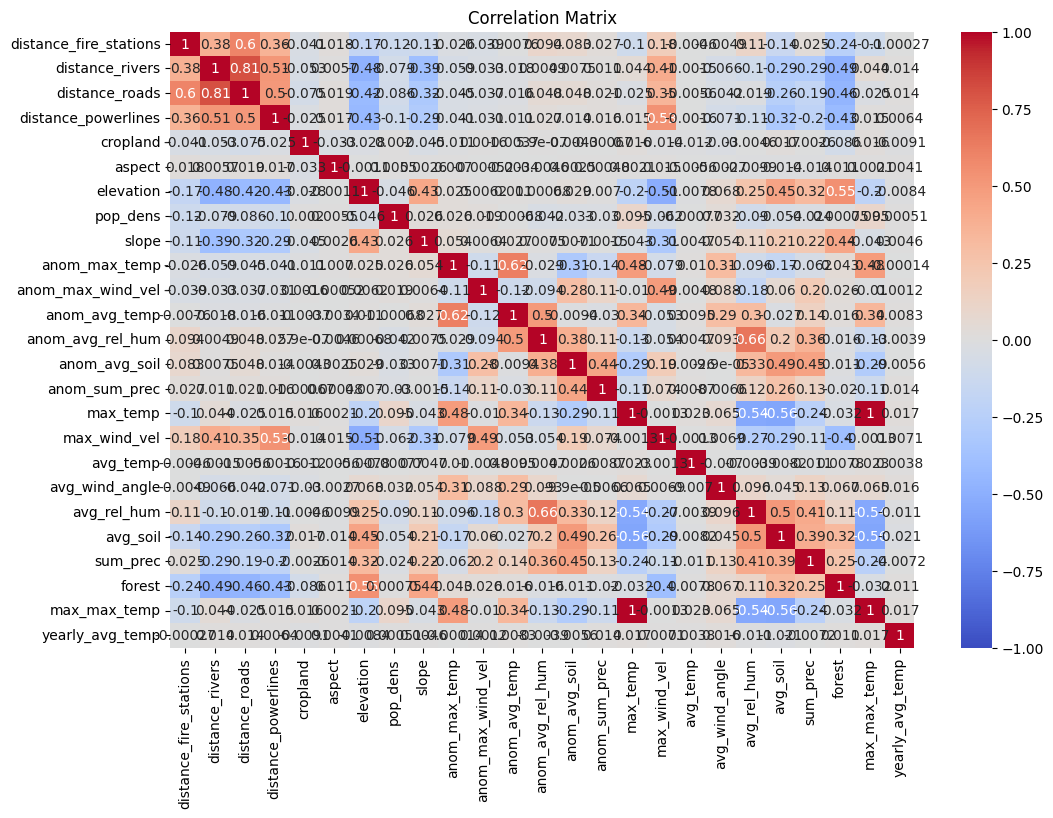

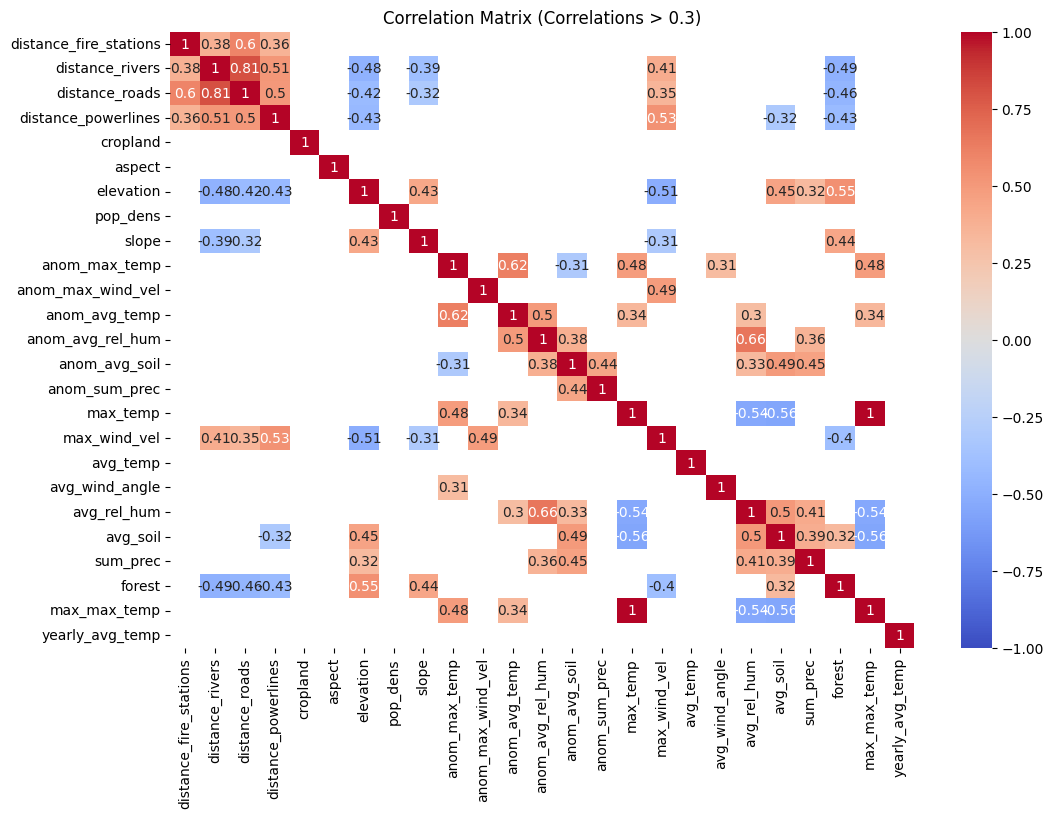

In [10]:
# Calculate the correlation matrix
correlation_matrix = df[numeric_vars].corr()

# Plot the correlation matrix using Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Filter correlations greater than 0.3
high_corr = correlation_matrix[abs(correlation_matrix) > 0.3]

# Plot the correlation matrix for correlations greater than 0.3
plt.figure(figsize=(12, 8))
sns.heatmap(high_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix (Correlations > 0.3)')
plt.show()


In [11]:
# Remove the 'max_max_temp' column as it's the same variable as 'max_temp'
df.drop(columns=['max_max_temp'], inplace=True)

# Data Selection

**Step 1: Data Preparation and Splitting**
We begin by selecting numeric and categorical variables for analysis. Missing values in numeric variables are filled with their mean. The data is split into training and test sets.

**Step 2: Data Preprocessing**
Numeric variables are standardized using StandardScaler, while categorical variables are encoded using OneHotEncoder.

**Step 3: Model Creation and Feature Selection**
A logistic regression model is created. SelectFromModel is used to perform feature selection. We create two logistic regression models: one using all features and another using only the selected features. This comparison helps us understand how the model's performance is affected by variable selection.

**Step 4: Model Training and Prediction**
Both models are trained using the training data and then used to predict on the test set. Classification reports are printed to evaluate the performance of each model.

**Step 5: Selected Variable Indices**
We identify the indices of the selected variables and display their names. This helps us understand which features were deemed important by the feature selection process.

Here are the 4 features selected :
- distance_roads
- distance_powerlines
- max_temp
- avg_rel_hum

---
Given more time and input of insurance experts, we might create derived variables, discuss the relevance of various features, and potentially incorporate external variables from open data sources. Collaborating with experts in claims assessment could provide invaluable insights for enhancing the model's predictive power.


In [12]:
# Select numeric and categorical variables for analysis
numeric_vars = ['distance_fire_stations', 'distance_rivers', 'distance_roads', 'distance_powerlines', 'cropland', 
                'aspect', 'elevation', 'pop_dens', 'slope', 'anom_max_temp', 'anom_max_wind_vel', 'anom_avg_temp', 
                'anom_avg_rel_hum', 'anom_avg_soil', 'anom_sum_prec', 'max_temp', 'max_wind_vel', 'avg_temp', 
                'avg_wind_angle', 'avg_rel_hum', 'avg_soil', 'sum_prec', 'forest', 'yearly_avg_temp']
categorical_vars = ['vegetation_class']  # Add categorical variables here

# Replace missing values with the mean for numeric variables only
df[numeric_vars] = df[numeric_vars].fillna(df[numeric_vars].mean())

# Split the data into training and test sets
X = df[numeric_vars + categorical_vars]
y = df['ignition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data preprocessing (standardize numeric variables and encode categorical variables)
numeric_transformer = StandardScaler()  # Standardize numeric variables
categorical_transformer = OneHotEncoder(handle_unknown='ignore')  # Encode categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_vars),
        ('cat', categorical_transformer, categorical_vars)
    ])

# Create a logistic regression model
model = LogisticRegression(random_state=42)

# Use SelectFromModel to select important features
selector = SelectFromModel(estimator=model, prefit=False)  # Feature selection
X_train_preprocessed = preprocessor.fit_transform(X_train)  # Preprocess training data
X_train_selected = selector.fit_transform(X_train_preprocessed, y_train)  # Select important features
X_test_preprocessed = preprocessor.transform(X_test)  # Preprocess test data
X_test_selected = selector.transform(X_test_preprocessed)  # Select same features for test data

# Train a new logistic regression model on the selected features (without feature selection)
model_wo = LogisticRegression(random_state=42)  # Create logistic regression model
model_wo.fit(X_train_preprocessed, y_train)  # Train on preprocessed data

# Train a new logistic regression model on the selected features (with feature selection)
model_selected = LogisticRegression(random_state=42)  # Create logistic regression model
model_selected.fit(X_train_selected, y_train)  # Train on selected features

# Predict on the test set without variable selection
y_pred_wo = model_wo.predict(X_test_preprocessed)

# Display classification report to evaluate performance
print("Classification Report (Before Variable Selection):")
print(classification_report(y_test, y_pred_wo))

# Predict on the test set with variable selection
y_pred = model_selected.predict(X_test_selected)

# Display classification report to evaluate performance
print("Classification Report (After Variable Selection):")
print(classification_report(y_test, y_pred))

# Get the indices of selected variables
selected_indices = selector.get_support(indices=True)
numeric_selected_indices = [i for i in selected_indices if i < len(numeric_vars)]
selected_vars = [numeric_vars[i] for i in numeric_selected_indices] 

# Display the selected numeric variables
print("Selected Variables:")
for var in selected_vars:
    print(var)


C:\Users\channa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\channa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Classification Report (Before Variable Selection):
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      3774
           1       0.61      0.33      0.42       633

    accuracy                           0.87      4407
   macro avg       0.75      0.65      0.68      4407
weighted avg       0.85      0.87      0.86      4407

Classification Report (After Variable Selection):
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      3774
           1       0.55      0.26      0.35       633

    accuracy                           0.86      4407
   macro avg       0.72      0.61      0.64      4407
weighted avg       0.84      0.86      0.84      4407

Selected Variables:
distance_roads
distance_powerlines
max_temp
avg_rel_hum


# Model 

**Step 1: Setting a Common Threshold**
A common threshold of 0.5 is established for class predictions (>0.5 = 1, <0.5 = 0).

**Step 2: Model Initialization**
Classification models (Logistic Regression, Random Forest, XGBoost, LightGBM) are initialized with random seeds for reproducibility.

**Step 3: Model Training and Prediction**
Each model is trained on the selected features using the training data. Predictions and predicted probabilities are generated for the test set.

**Step 4: Model Evaluation and Visualization**
For each model, classification reports, confusion matrices, and ROC curves are computed and displayed.

**Step 5: Results Compilation and Selection**
Evaluation metrics such as recall, F1-score, AUC-ROC, specificity, and positive precision are gathered for each model. 


##### The Random Forest model is selected based on its performance and his fewer false negatives prediction. #####

---
**Improvement Potential**
: In further iterations of this code, a refinement could involve performing feature selection independently on each model rather than just on the logistic regression. 




[LightGBM] [Info] Number of positive: 2687, number of negative: 14941
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000135 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1030
[LightGBM] [Info] Number of data points in the train set: 17628, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.152428 -> initscore=-1.715684
[LightGBM] [Info] Start training from score -1.715684
Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      3774
           1       0.55      0.26      0.35       633

    accuracy                           0.86      4407
   macro avg       0.72      0.61      0.64      4407
weighted avg       0.84      0.86      0.84      4407

Confusion Matrix:
[[3641  133]
 [ 470  163]]


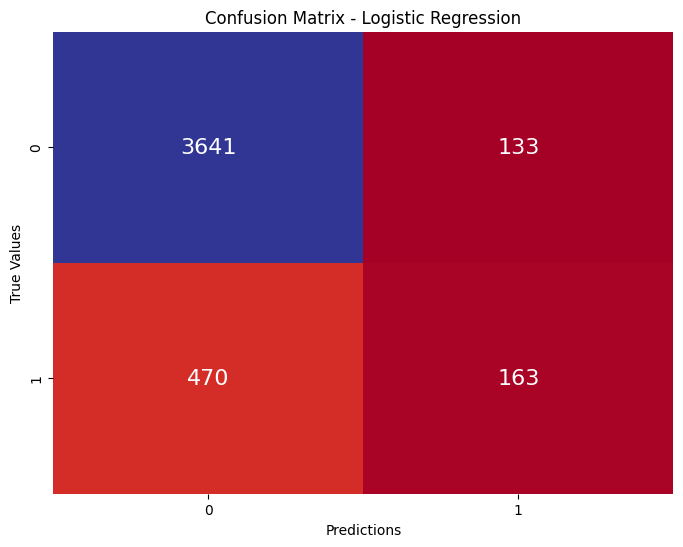

Model: Random Forest
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      3774
           1       0.64      0.44      0.52       633

    accuracy                           0.88      4407
   macro avg       0.77      0.70      0.73      4407
weighted avg       0.87      0.88      0.87      4407

Confusion Matrix:
[[3617  157]
 [ 356  277]]


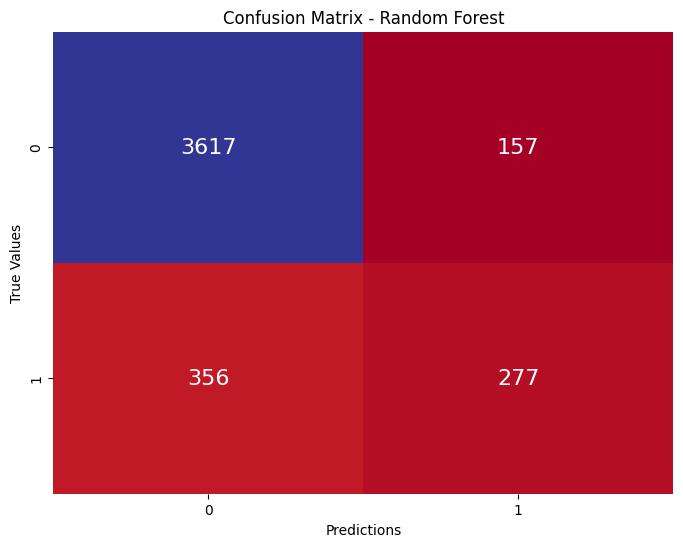

Model: XGBoost
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      3774
           1       0.62      0.42      0.50       633

    accuracy                           0.88      4407
   macro avg       0.76      0.69      0.72      4407
weighted avg       0.87      0.88      0.87      4407

Confusion Matrix:
[[3607  167]
 [ 365  268]]


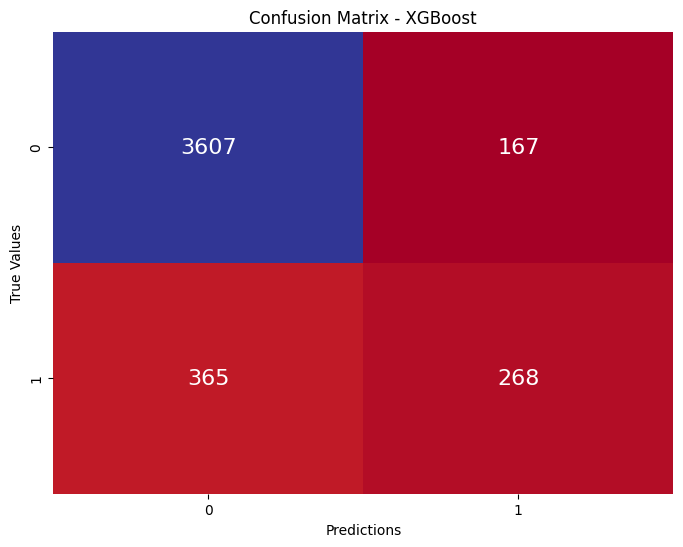

Model: LightGBM
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      3774
           1       0.64      0.40      0.49       633

    accuracy                           0.88      4407
   macro avg       0.77      0.68      0.71      4407
weighted avg       0.87      0.88      0.87      4407

Confusion Matrix:
[[3630  144]
 [ 378  255]]


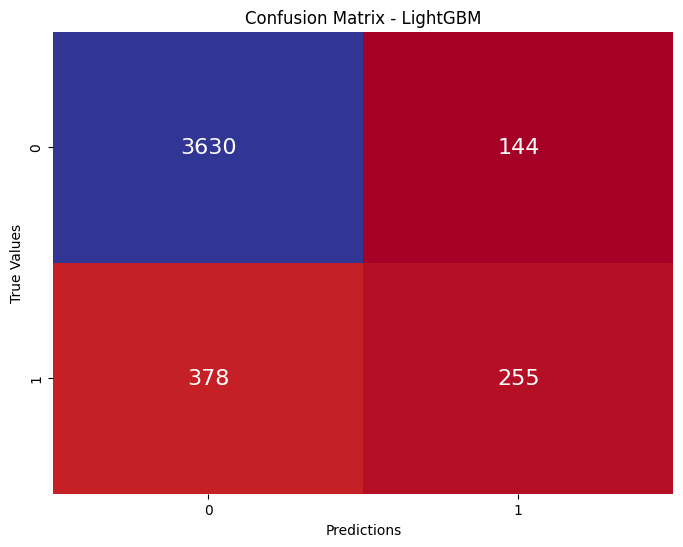

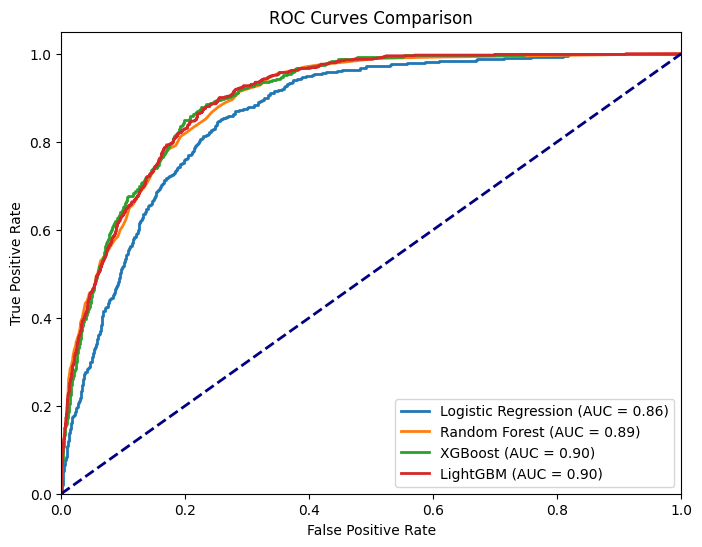

                 Model    Recall  F1-score   AUC-ROC  Specificity  \
0  Logistic Regression  0.257504  0.350915  0.862366     0.964759   
1        Random Forest  0.437599  0.519213  0.894126     0.958400   
2              XGBoost  0.423381  0.501873  0.898461     0.955750   
3             LightGBM  0.402844  0.494186  0.897589     0.961844   

   Positive Precision  
0            0.550676  
1            0.638249  
2            0.616092  
3            0.639098  
The selected model is: Random Forest


In [14]:
# Set a common threshold for predictions
common_threshold = 0.5


# Initialize classification models
model_glm = LogisticRegression(random_state=42)  # Logistic Regression
model_rf = RandomForestClassifier(random_state=42)  # Random Forest
model_xgb = XGBClassifier(random_state=42)  # XGBoost
model_lgbm = LGBMClassifier(random_state=42)  # LightGBM

# Train the models on the training data
model_glm.fit(X_train_selected, y_train)
model_rf.fit(X_train_selected, y_train)
model_xgb.fit(X_train_selected, y_train)
model_lgbm.fit(X_train_selected, y_train)


# Train and predict using the models
y_pred_glm = model_glm.predict(X_test_selected)
y_prob_glm = model_glm.predict_proba(X_test_selected)[:, 1]

y_pred_rf = model_rf.predict(X_test_selected)
y_prob_rf = model_rf.predict_proba(X_test_selected)[:, 1]

y_pred_xgb = model_xgb.predict(X_test_selected)
y_prob_xgb = model_xgb.predict_proba(X_test_selected)[:, 1]

y_pred_lgbm = model_lgbm.predict(X_test_selected)
y_prob_lgbm = model_lgbm.predict_proba(X_test_selected)[:, 1]

# List of models with their predicted labels and probabilities
models = [
    ('Logistic Regression', y_pred_glm, y_prob_glm),
    ('Random Forest', y_pred_rf, y_prob_rf),
    ('XGBoost', y_pred_xgb, y_prob_xgb),
    ('LightGBM', y_pred_lgbm, y_prob_lgbm)
]

# List to store model evaluation results
results = []

# Initialize lists to store fpr and tpr values for all models
all_fpr = []
all_tpr = []

# Loop through each model and evaluate its performance
for model_name, y_pred, y_prob in models:
    # Calculate classification report, ROC curve, AUC-ROC, specificity, and precision
    report = classification_report(y_test, y_pred, output_dict=True)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    specificity = report['0']['recall']
    precision_positive = report['1']['precision']
    
    # Store evaluation results in a dictionary
    result = {
        'Model': model_name,
        'Recall': report['1']['recall'],
        'F1-score': report['1']['f1-score'],
        'AUC-ROC': roc_auc,
        'Specificity': specificity,
        'Positive Precision': precision_positive
    }
    results.append(result)

        # Store fpr and tpr values for later plotting
    all_fpr.append(fpr)
    all_tpr.append(tpr)
    
    # Display classification report
    print(f"Model: {model_name}")
    print(classification_report(y_test, y_pred))
    
    # Display confusion matrix
    confusion_mtx = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(confusion_mtx)
    
    # Create a heatmap of the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_mtx, annot=True, fmt="d", cmap=sns.color_palette("RdYlBu", as_cmap=True), cbar=False,
                annot_kws={"size": 16, "color": "white"})
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predictions")
    plt.ylabel("True Values")
    plt.show()
    
    # Plot all ROC curves on a single graph
plt.figure(figsize=(8, 6))
for i, model_name in enumerate([model[0] for model in models]):
    plt.plot(all_fpr[i], all_tpr[i], lw=2, label=f'{model_name} (AUC = %0.2f)' % results[i]['AUC-ROC'])

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(loc="lower right")
plt.show()

# Create a DataFrame from the evaluation results
results_df = pd.DataFrame(results)

# Display the evaluation results
print(results_df)

# Select the Random Forest model due to its strong performance and lower false negatives
selected_model = 'Random Forest'
print(f"The selected model is: {selected_model}")

